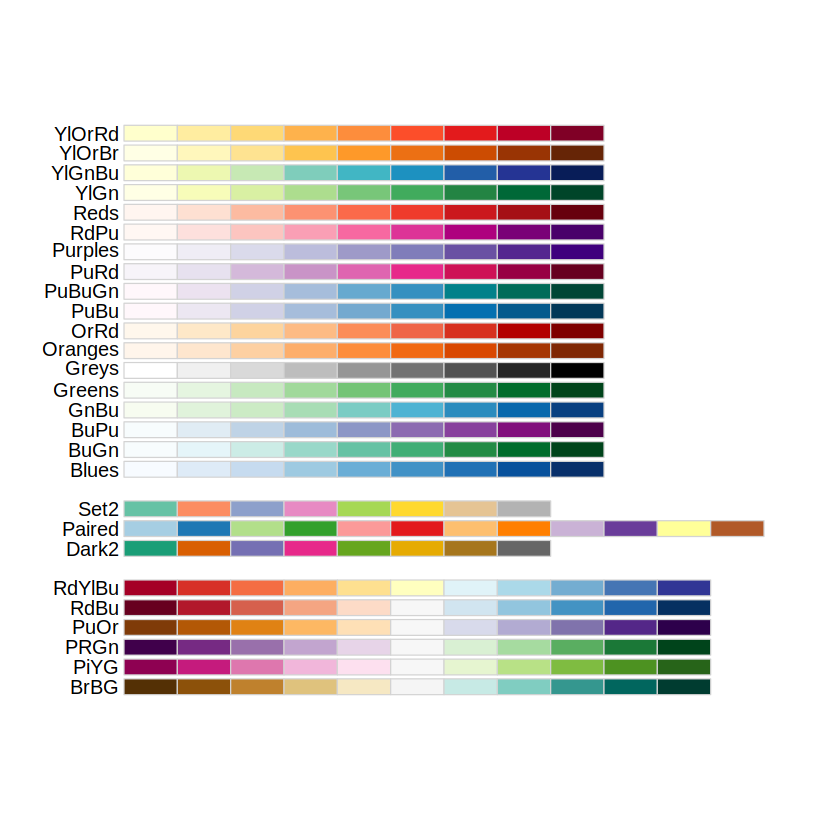

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)
options(repr.matrix.max.rows = 6)

In [6]:
url <- "https://raw.githubusercontent.com/chwu01/DSCI-Group-Project/main/data/Housing.csv?token=GHSAT0AAAAAACJLPUGVZAVJVT4ABCKVY53KZJ4B4RQ"
housing <- read_csv(url)
housing

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


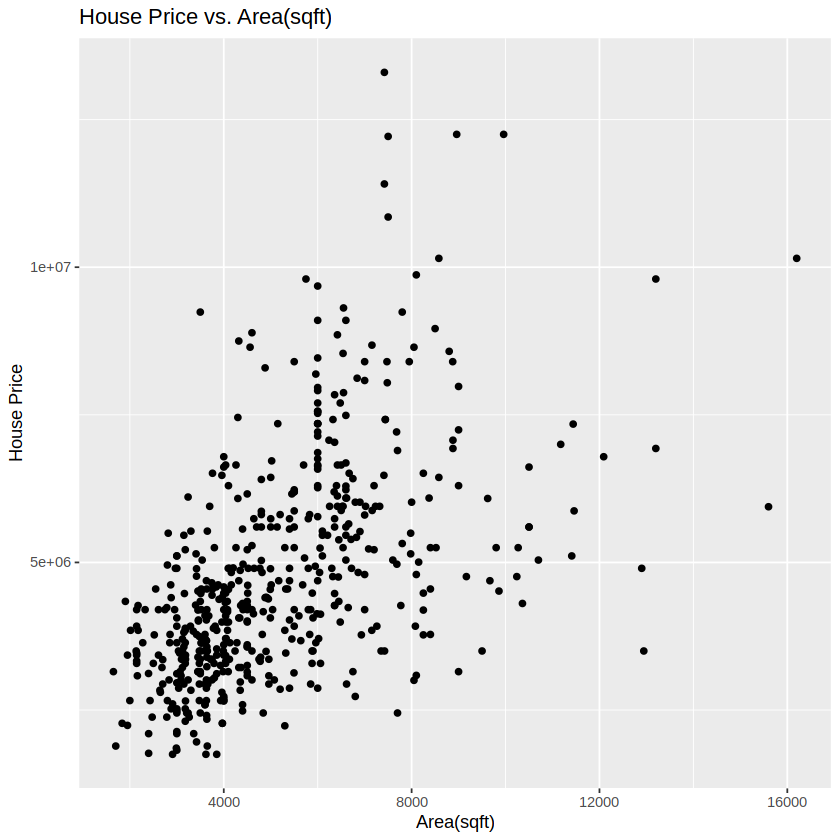

In [48]:
housing <- housing |>
    mutate(furnishingstatus = as_factor(furnishingstatus),
          mainroad = as_factor(mainroad),
          guestroom = as_factor(guestroom),
          basement = as_factor(basement),
          hotwaterheating = as_factor(hotwaterheating),
          airconditioning = as_factor(airconditioning),
          prefarea = as_factor(prefarea))

#Scatterplot for price vs. area
housing_plot <- housing|>
    ggplot(aes(x = area, y = price))+
    geom_point()+
    labs(x = "Area(sqft)", y = "House Price")+
    ggtitle("House Price vs. Area(sqft)")
housing_plot

**Housing price vs. Numbers of stories**

stories,count,mean_price,check_na
<dbl>,<int>,<dbl>,<int>
1,227,4170659,0
2,238,4764074,0
3,39,5685436,0
4,41,7208450,0


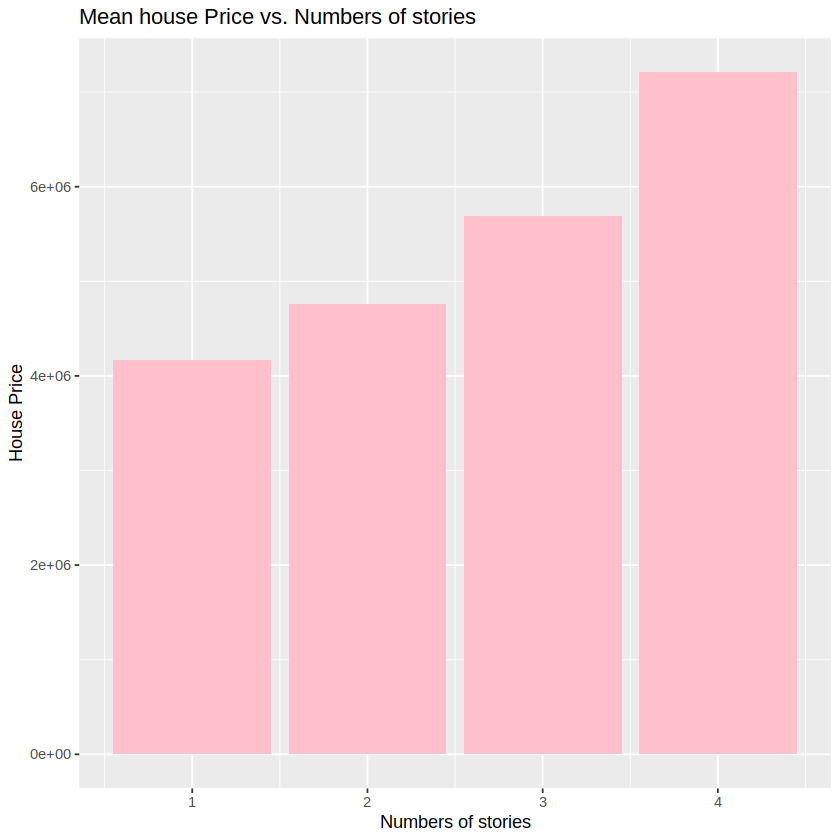

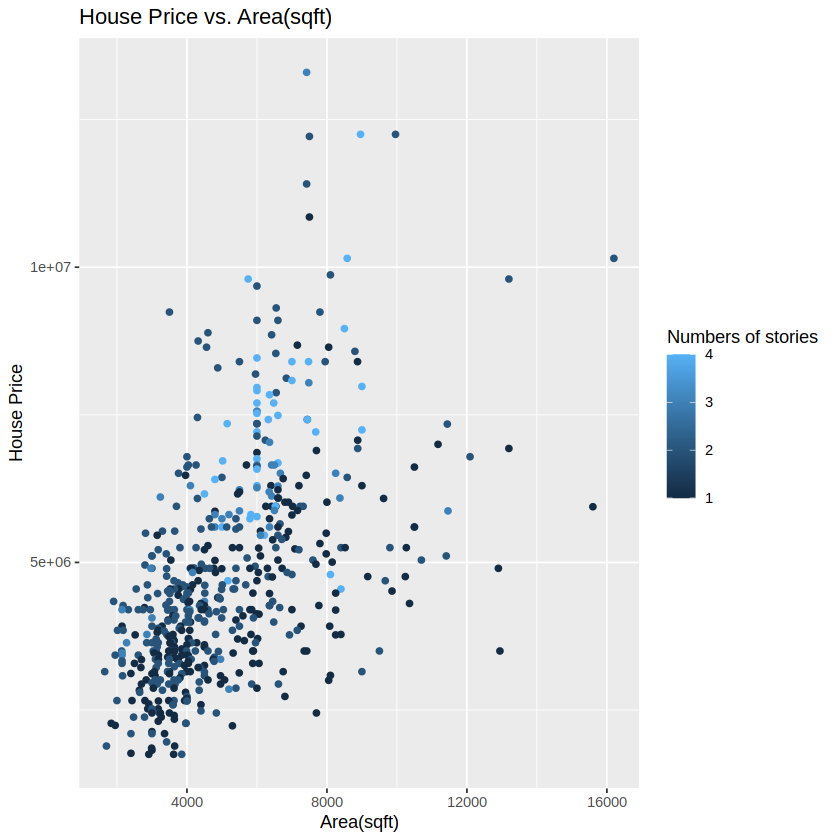

In [74]:
housing_stories_count <- housing|>
                      group_by(stories) |>
                      summarize(count = n(),
                          mean_price = mean(price, na.rm = TRUE),
                          check_na = sum(is.na(price)))

housing_stories_count

housing_stories_bar <- housing_stories_count|>
    ggplot(aes(x = stories, y = mean_price))+
    geom_bar(stat = "identity", fill = "pink")+
    labs(x = "Numbers of stories", y = "House Price")+
    ggtitle("Mean house Price vs. Numbers of stories")
housing_stories_bar

housing_stories_plot <- housing|>
    ggplot(aes(x = area, y = price, colour = stories))+
    geom_point()+
    labs(x = "Area(sqft)", y = "House Price", colour = "Numbers of stories")+
    ggtitle("House Price vs. Area(sqft)")
housing_stories_plot

**Observation**: There is a positive correlation between numbers of stories and house price. 

**Housing price vs. parking**

In [60]:
#summarize observation
housing_parking_count <- housing|>
                      group_by(parking) |>
                      summarize(count = n(),
                          mean_price = mean(price, na.rm = TRUE),
                          check_na = sum(is.na(price)))

housing_parking_count

parking,count,mean_price,check_na
<dbl>,<int>,<dbl>,<int>
0,299,4136017,0
1,126,5190389,0
2,108,5896328,0
3,12,5867167,0


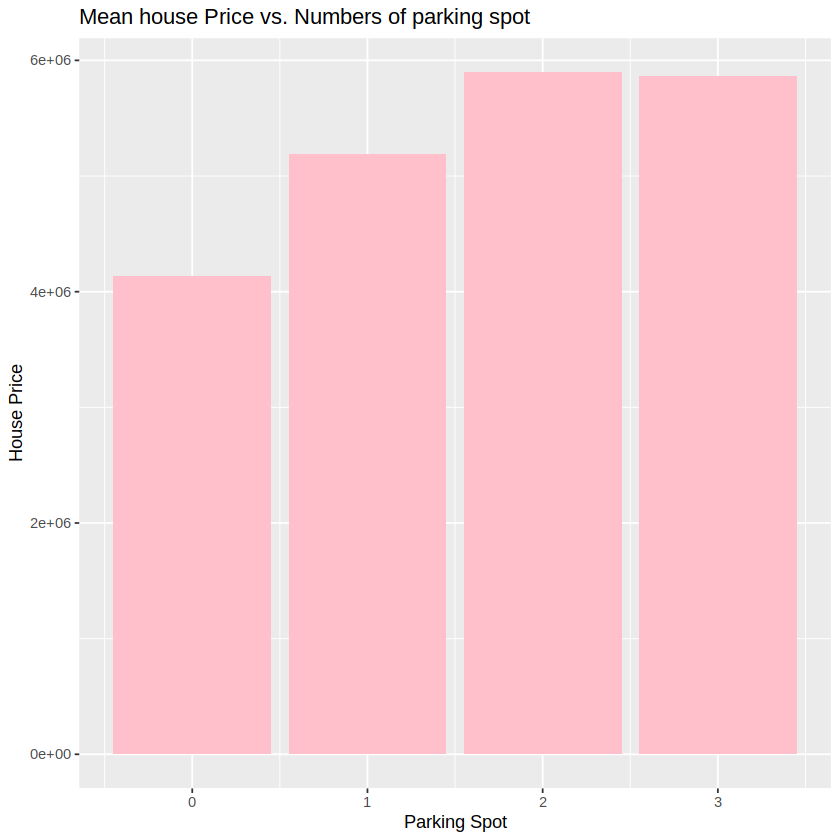

In [70]:
housing_parking_plot <- housing_parking_count|>
    ggplot(aes(x = parking, y = mean_price))+
    geom_bar(stat = "identity", fill = "pink")+
    labs(x = "Parking Spot", y = "House Price")+
    ggtitle("Mean house Price vs. Numbers of parking spot")
housing_parking_plot

**Observation**: There is a negative correlation between numbers of stories and house price.

**How does furnishing status affect housing price?**

In [28]:
#splitting data based on its furnishing status
housing_split <- initial_split(housing, prop = 0.75, strata = furnishingstatus)
housing_train <- training(housing_split)
housing_test <- testing(housing_split) 

#summarize obeservation
housing_fs_count <- housing_train |>
                      group_by(furnishingstatus) |>
                      summarize(count = n(),
                          mean_area = mean(area, na.rm = TRUE),
                          mean_price = mean(price, na.rm = TRUE),
                          check_na = sum(is.na(area) | is.na(price)))

housing_fs_count

furnishingstatus,count,mean_area,mean_price,check_na
<fct>,<int>,<dbl>,<dbl>,<int>
furnished,105,5636.800,5414128,0
semi-furnished,170,5142.418,4849330,0
unfurnished,133,4651.797,3998053,0


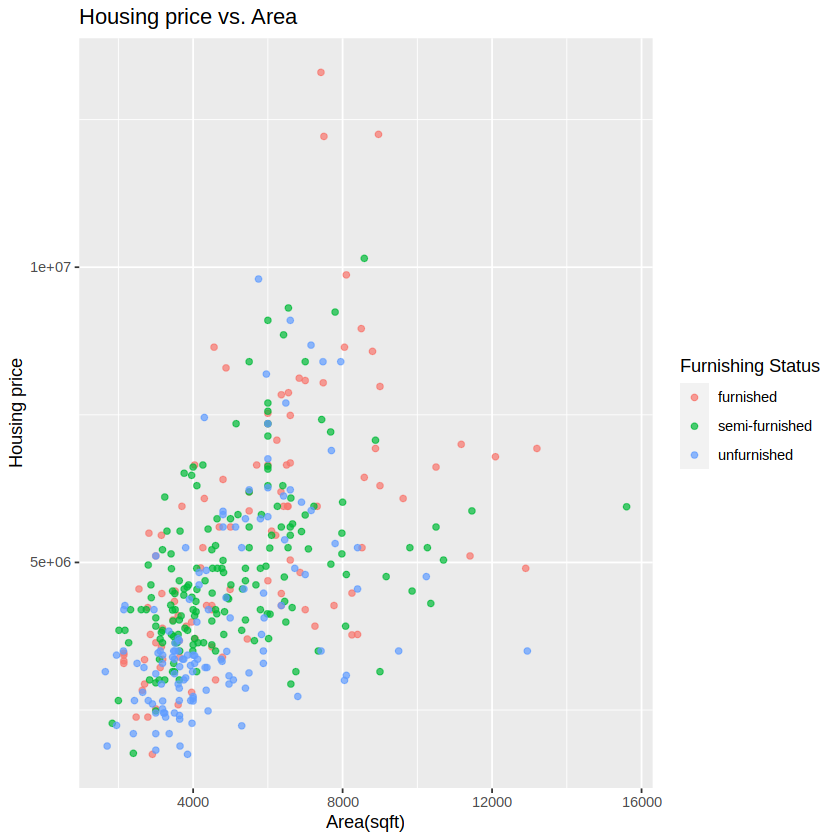

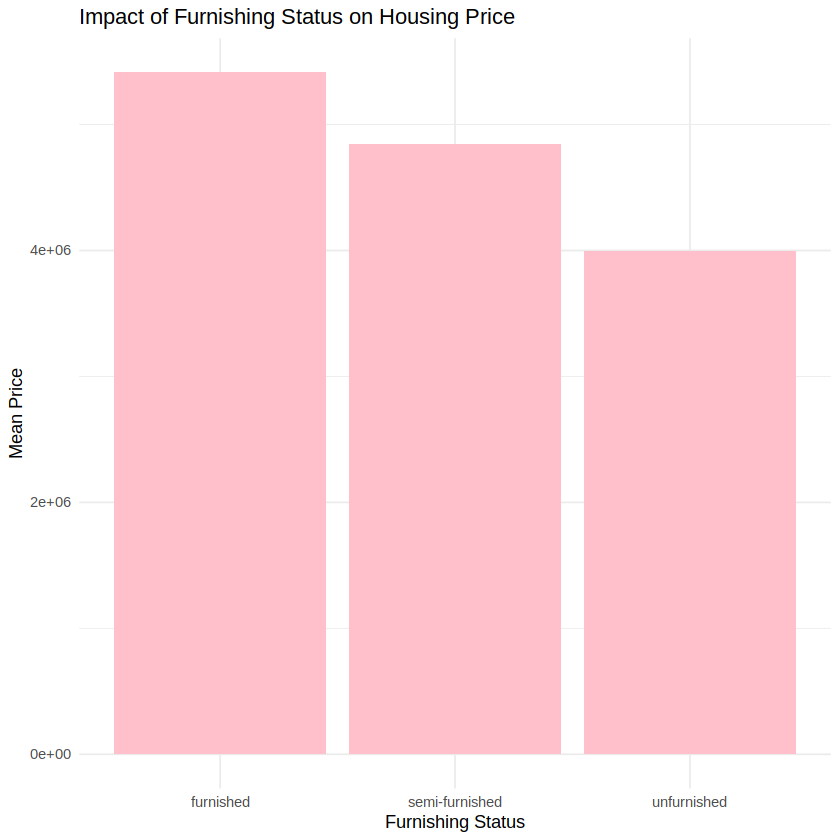

In [72]:
housing_fs_plot <- housing_train|>
    ggplot(aes(x = area, y = price, colour = furnishingstatus))+
    geom_point(alpha = 0.7)+
    labs(title = "Housing price vs. Area", x = "Area(sqft)", y = "Housing price", colour = "Furnishing Status")
housing_fs_plot

housing_fs_bar <- housing_fs_count|>
    ggplot(aes(x = furnishingstatus, y = mean_price)) +
    geom_bar(stat = "identity", fill = "pink") +
    labs(title = "Impact of Furnishing Status on Housing Price",
        x = "Furnishing Status",
        y = "Mean Price") +
    theme_minimal()
housing_fs_bar

**Observation**: Furnished houses tend to have higher average price.